In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import sys

sys.path.append("../stabilvol")
from utility.classes.data_extraction import DataExtractor

# How to make Returns

## Watch Prices

In [5]:
market = 'GF'
df = pd.read_pickle(f'../data/raw/{market}.pickle')
df.head()

,BPE,WWG,LEC,PIT,ADC,SIM0,MFL2,ALX,PHH2,EIS,...,R1B,86L0,IQL1,ELNJ,RCVR,FC90,3330,6ON,OFI,ESBCI
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


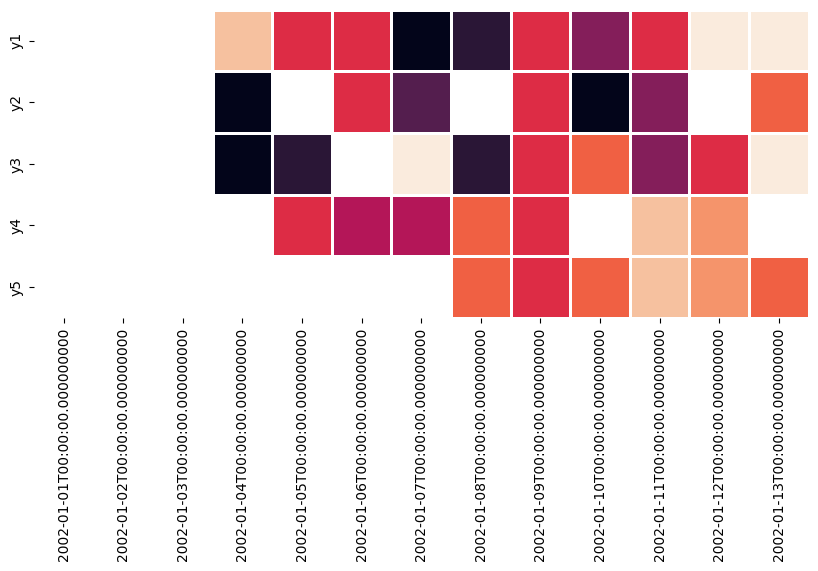

In [6]:
Y1 = [np.nan, np.nan, np.nan, 9, 6, 6, 1, 2, 6, 4, 6, 10, 10]
Y2 = [np.nan, np.nan, np.nan, 1, np.nan, 6, 3, np.nan, 6, 1, 4, np.nan, 7]
Y3 = [np.nan, np.nan, np.nan, 1, 2, np.nan, 10, 2, 6, 7, 4, 6, 10]
Y4 = [np.nan, np.nan, np.nan, np.nan, 6, 5, 5, 7, 6, np.nan, 9, 8, np.nan]
Y5 = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 7, 6, 7, 9, 8, 7]
fk = pd.DataFrame(np.array([Y1, Y2, Y3, Y4, Y5]).T,
                  columns=['y1', 'y2', 'y3', 'y4', 'y5'],
                  index=pd.date_range('2002-01-01', periods=13))
fig, ax = plt.subplots(figsize=(10, 4))
g = sns.heatmap(fk.T, linewidths=1, linecolor='white', cbar=False, ax=ax)

In [7]:
returns = fk.pct_change(fill_method=None)
pd.merge(returns['y2'], fk['y2'], left_index=True, right_index=True)

,y2_x,y2_y
2002-01-01,NaN,NaN
2002-01-02,NaN,NaN
2002-01-03,NaN,NaN
2002-01-04,NaN,1.0
2002-01-05,NaN,NaN
2002-01-06,NaN,6.0
2002-01-07,-0.500000,3.0
2002-01-08,NaN,NaN
2002-01-09,NaN,6.0
2002-01-10,-0.833333,1.0


In [ ]:
filename = '../data/interim/GF.pickle'
alldata = pd.read_pickle(filename).loc['2002':'2014']
extractor = DataExtractor(start_date='2002-01-01', duration=12, criterion_value=6)
selected = extractor.extract_data(filename)
selected

In [ ]:
total_std = selected.std().mean()
start = -0.1 * total_std
end = -1.5 * total_std
print(total_std, start, end, sep='\n')

In [ ]:
ax = sns.heatmap(alldata.T,
                 vmin=alldata.min().mean(),
                 vmax=alldata.max().mean())

In [ ]:
ax = sns.heatmap(selected.T,
                 vmin=selected.min().median(),
                 vmax=selected.max().median())

In [ ]:
selected.describe(percentiles=[]).T.describe(percentiles=[])